In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px

In [2]:
#date = datetime.today().strftime('%Y-%m-%d')
date = '2022-08-01'
date

'2022-08-01'

In [121]:
dataTotalComunas = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv")
dataTotalComunas = dataTotalComunas.drop("Tasa", axis=1)
dataTotalComunas.tail()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2022-07-22,2022-07-25,2022-07-29,2022-08-01,2022-08-05,2022-08-08,2022-08-12,2022-08-15,2022-08-19,2022-08-22
357,Magallanes,12,Rio Verde,12103.0,211.0,0.0,0.0,0.0,0.0,0.0,...,37.0,37.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0
358,Magallanes,12,San Gregorio,12104.0,681.0,0.0,0.0,0.0,0.0,0.0,...,144.0,144.0,144.0,144.0,145.0,145.0,145.0,145.0,145.0,146.0
359,Magallanes,12,Timaukel,12303.0,282.0,0.0,0.0,0.0,0.0,0.0,...,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0
360,Magallanes,12,Torres del Paine,12402.0,1021.0,0.0,0.0,0.0,0.0,0.0,...,97.0,97.0,97.0,97.0,103.0,104.0,104.0,105.0,107.0,107.0
361,Magallanes,12,Desconocido Magallanes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,54.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,56.0


In [126]:
dataTotalComunas = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv")
dataTotalComunas = dataTotalComunas.drop("Tasa", axis=1)
dataTotalComunas = dataTotalComunas.melt(['Region','Codigo region','Comuna','Codigo comuna', 'Poblacion'], var_name='Fecha')
dataTotalComunas=dataTotalComunas.rename(columns = {'value': 'Casos'}, inplace = False)
dataTotalComunas= dataTotalComunas.loc[(dataTotalComunas["Codigo comuna"].notnull())]
dataTotalComunas.head(10)

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,Fecha,Casos
0,Arica y Parinacota,15,Arica,15101.0,247552.0,2020-03-30,6.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,2020-03-30,0.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,2020-03-30,0.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,2020-03-30,0.0
5,Tarapacá,1,Alto Hospicio,1107.0,129999.0,2020-03-30,0.0
6,Tarapacá,1,Camina,1402.0,1375.0,2020-03-30,0.0
7,Tarapacá,1,Colchane,1403.0,1583.0,2020-03-30,0.0
8,Tarapacá,1,Huara,1404.0,3000.0,2020-03-30,0.0
9,Tarapacá,1,Iquique,1101.0,223463.0,2020-03-30,5.0
10,Tarapacá,1,Pica,1405.0,5958.0,2020-03-30,0.0


In [123]:
dataTotalComunas= dataTotalComunas.loc[(dataTotalComunas["Region"] == "Arica y Parinacota") & (dataTotalComunas["Comuna"] == "Arica"), ["Codigo region","Comuna", "Codigo comuna", "Fecha", "Casos"]]
dataTotalComunas

,Codigo region,Comuna,Codigo comuna,Fecha,Casos
0,15,Arica,15101.0,2020-03-30,6.0
362,15,Arica,15101.0,2020-04-01,6.0
724,15,Arica,15101.0,2020-04-03,12.0
1086,15,Arica,15101.0,2020-04-06,41.0
1448,15,Arica,15101.0,2020-04-08,63.0
...,...,...,...,...,...
89776,15,Arica,15101.0,2022-08-08,71627.0
90138,15,Arica,15101.0,2022-08-12,72812.0
90500,15,Arica,15101.0,2022-08-15,73457.0
90862,15,Arica,15101.0,2022-08-19,74222.0


In [129]:
def get_linetotalComunas(data, comuna):
    data= data.loc[data["Comuna"] == comuna, ["Codigo region","Comuna", "Codigo comuna", "Fecha", "Casos"]]
    fig = px.line(data, x="Fecha", y="Casos", title='Casos Totales Acumulados Comuna',color_discrete_sequence = ['red'])
    return fig

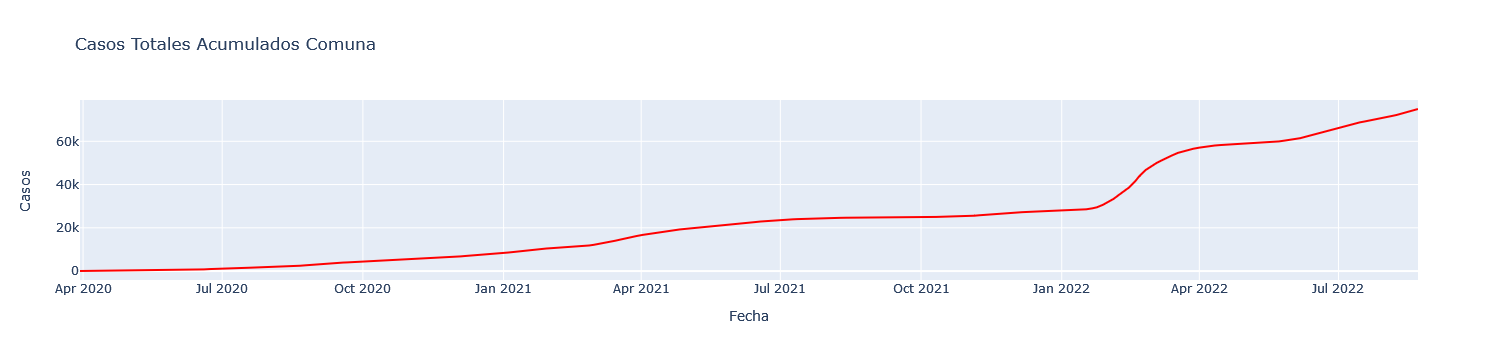

In [134]:
get_linetotalComunas(dataTotalComunas, "Concepcion")

In [132]:
dataTotalComunas[dataTotalComunas.Region == "Arica y Parinacota"]

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,Fecha,Casos
0,Arica y Parinacota,15,Arica,15101.0,247552.0,2020-03-30,6.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,2020-03-30,0.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,2020-03-30,0.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,2020-03-30,0.0
362,Arica y Parinacota,15,Arica,15101.0,247552.0,2020-04-01,6.0
...,...,...,...,...,...,...,...
90865,Arica y Parinacota,15,Putre,15201.0,2515.0,2022-08-19,495.0
91224,Arica y Parinacota,15,Arica,15101.0,247552.0,2022-08-22,74694.0
91225,Arica y Parinacota,15,Camarones,15102.0,1233.0,2022-08-22,194.0
91226,Arica y Parinacota,15,General Lagos,15202.0,810.0,2022-08-22,111.0
